<a href="https://colab.research.google.com/github/emmenets/neuralnetwork/blob/master/190624_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.special as ss

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
from IPython.display import clear_output
import urllib
import time
import os, sys
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


Ordner erstellen

In [0]:
#path ="/gdrive/My Drive/colabfiles/rcnnopencv/"
#tf.gfile.MkDir(path)




In [0]:
cd /gdrive/My\ Drive/colabfiles/keras-mask-rcnn/


/gdrive/My Drive/colabfiles/keras-mask-rcnn


In [0]:
!pip install numpy scipy
!pip install pillow scikit-image matplotlib imutils
!pip install tensorflow 
!pip install keras h5py

In [0]:
!git clone https://github.com/matterport/Mask_RCNN.git


Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 119.41 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (569/569), done.
Checking out files: 100% (76/76), done.


In [0]:
cd Mask_RCNN

/gdrive/My Drive/colabfiles/keras-mask-rcnn/Mask_RCNN


In [0]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mr

In [0]:
!python

Python 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import mrcnn
>>> import cv2
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


In [0]:
!cat "/gdrive/My Drive/colabfiles/keras-mask-rcnn/maskrcnn_predict.py"

# USAGE
# python maskrcnn_predict.py --weights mask_rcnn_coco.h5 --labels coco_labels.txt --image images/30th_birthday.jpg

# import the necessary packages
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import numpy as np
import colorsys
import argparse
import imutils
import random
import cv2
import os

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-w", "--weights", required=True,
	help="path to Mask R-CNN model weights pre-trained on COCO")
ap.add_argument("-l", "--labels", required=True,
	help="path to class labels file")
ap.add_argument("-i", "--image", required=True,
	help="path to input image to apply Mask R-CNN to")
args = vars(ap.parse_args())

# load the class label names from disk, one label per line
CLASS_NAMES = open(args["labels"]).read().strip().split("\n")

# generate random (but visually distinct) colors for each class label
# (thanks to Matterport Mask R-CNN for the

W0624 18:20:34.727986 140129525950336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 18:20:34.772160 140129525950336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 18:20:34.780130 140129525950336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 18:20:34.819756 140129525950336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0624 18:20:34.825402 140129525

[INFO] loading Mask R-CNN model...


W0624 18:20:37.666682 140129525950336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0624 18:20:38.149633 140129525950336 deprecation_wrapper.py:119] From /gdrive/My Drive/colabfiles/keras-mask-rcnn/Mask_RCNN/mrcnn/model.py:341: The name tf.log is deprecated. Please use tf.math.log instead.

W0624 18:20:38.163565 140129525950336 deprecation.py:323] From /gdrive/My Drive/colabfiles/keras-mask-rcnn/Mask_RCNN/mrcnn/model.py:399: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0624 18:20:38.172024 140129525950336 deprecation.py:506] From /gdrive/My Drive/colabfiles/keras-mask-rcnn/Mask_RCNN/mrcnn/model.py:423: calling crop_and_r

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (682, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


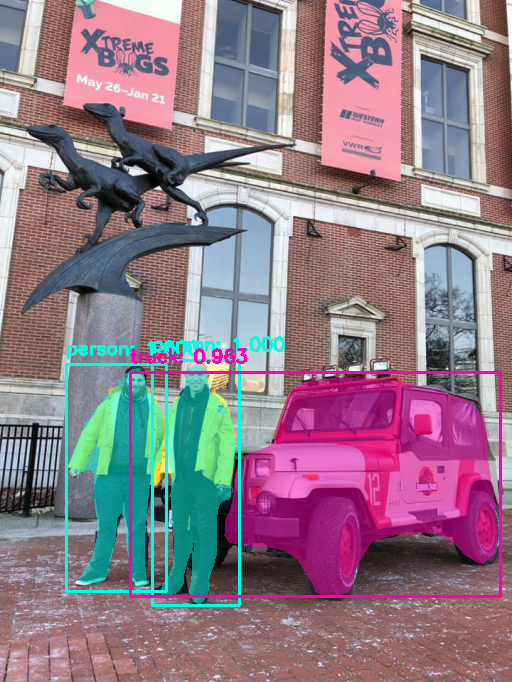

In [0]:
# USAGE
# python maskrcnn_predict.py --weights mask_rcnn_coco.h5 --labels coco_labels.txt --image images/30th_birthday.jpg

# import the necessary packages
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize

import colorsys

import random
import cv2
import os

# construct the argument parse and parse the arguments


# load the class label names from disk, one label per line
CLASS_NAMES = open("/gdrive/My Drive/colabfiles/keras-mask-rcnn/coco_labels.txt").read().strip().split("\n")

# generate random (but visually distinct) colors for each class label
# (thanks to Matterport Mask R-CNN for the method!)
hsv = [(i / len(CLASS_NAMES), 1, 1.0) for i in range(len(CLASS_NAMES))]
COLORS = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
random.seed(42)
random.shuffle(COLORS)

class SimpleConfig(Config):
	# give the configuration a recognizable name
	NAME = "coco_inference"

	# set the number of GPUs to use along with the number of images
	# per GPU
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

	# number of classes (we would normally add +1 for the background
	# but the background class is *already* included in the class
	# names)
	NUM_CLASSES = len(CLASS_NAMES)

# initialize the inference configuration
config = SimpleConfig()

# initialize the Mask R-CNN model for inference and then load the
# weights
print("[INFO] loading Mask R-CNN model...")
model = modellib.MaskRCNN(mode="inference", config=config,
	model_dir=os.getcwd())
model.load_weights("/gdrive/My Drive/colabfiles/keras-mask-rcnn/mask_rcnn_coco.h5", by_name=True)

# load the input image, convert it from BGR to RGB channel
# ordering, and resize the image
image = cv2.imread("/gdrive/My Drive/colabfiles/keras-mask-rcnn/images/30th_birthday.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=512)

# perform a forward pass of the network to obtain the results
print("[INFO] making predictions with Mask R-CNN...")
r = model.detect([image], verbose=1)[0]

# loop over of the detected object's bounding boxes and masks
for i in range(0, r["rois"].shape[0]):
	# extract the class ID and mask for the current detection, then
	# grab the color to visualize the mask (in BGR format)
	classID = r["class_ids"][i]
	mask = r["masks"][:, :, i]
	color = COLORS[classID][::-1]

	# visualize the pixel-wise mask of the object
	image = visualize.apply_mask(image, mask, color, alpha=0.5)

# convert the image back to BGR so we can use OpenCV's drawing
# functions
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# loop over the predicted scores and class labels
for i in range(0, len(r["scores"])):
	# extract the bounding box information, class ID, label, predicted
	# probability, and visualization color
	(startY, startX, endY, endX) = r["rois"][i]
	classID = r["class_ids"][i]
	label = CLASS_NAMES[classID]
	score = r["scores"][i]
	color = [int(c) for c in np.array(COLORS[classID]) * 255]

	# draw the bounding box, class label, and score of the object
	cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
	text = "{}: {:.3f}".format(label, score)
	y = startY - 10 if startY - 10 > 10 else startY + 10
	cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX,
		0.6, color, 2)

# show the output image
cv2_imshow(image)

		

Verzeichnis löschen

In [0]:
path ="/gdrive/My Drive/colabfiles/rcnnopencv/"
tf.gfile.DeleteRecursively(path)